In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [30]:
df_apps = pd.read_csv("apps.csv")
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.0,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.0,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


In [31]:
df_apps.shape

(10841, 12)

In [32]:
df_apps.drop(['Last_Updated', 'Android_Ver'], axis=1, inplace=True)
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.0,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.0,0,Free,0,Everyone,Business


In [7]:
nan_num = df_apps[df_apps.isna()]
nan_num.shape

(10841, 10)

<AxesSubplot:>

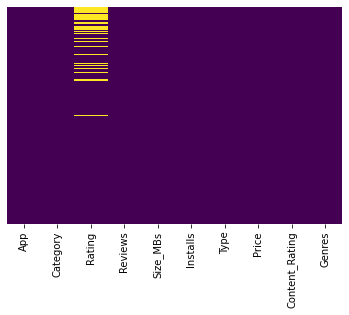

In [33]:
sns.heatmap(df_apps.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
df_apps.isnull().sum(axis = 0)

App                  0
Category             0
Rating            1474
Reviews              0
Size_MBs             0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
dtype: int64

In [35]:
df_apps_clean = df_apps.dropna()
df_apps_clean.shape

(9367, 10)

In [15]:
# duplicated_rows = df_apps_clean[df_apps_clean.duplicated()]
# print(duplicated_rows.shape)
# duplicated_rows.head()

(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.0,2,11.0,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.7,3,3.9,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.4,8,6.5,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.0,3,22.0,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.7,6,4.9,100,Free,0,Mature 17+,Dating


In [36]:
df_apps[df_apps['App'] == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.5,66577446,5.3,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.5,66509917,5.3,"1,000,000,000",Free,0,Teen,Social


In [37]:
df_apps_clean = df_apps.drop_duplicates(subset=['App', 'Type', 'Price'])
df_apps_clean[df_apps_clean['App']=='Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social


In [45]:
df_apps_clean.shape

(9662, 10)

In [40]:
for num in df_apps_clean.columns:
    print(df_apps_clean.duplicated([num]).sum())

2
9629
9622
4333
9191
9642
9659
9570
9656
9544


In [41]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres'],
      dtype='object')

In [27]:
df_apps_clean = len(df_apps_clean) - df_apps_clean.nunique()
print (df_apps)

App                1181
Category          10808
Rating            10802
Reviews            4840
Size_MBs          10370
Installs          10821
Type              10839
Price             10749
Content_Rating    10835
Genres            10722
dtype: int64


In [46]:
duplicate = df_apps_clean[df_apps_clean.duplicated('App')]
duplicate

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
5510,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.2,4559,6.4,"100,000",Free,0,Everyone,Medical
10479,Calculator,TOOLS,4.3,40770,3.4,"100,000,000",Free,0,Everyone,Tools


In [47]:
# Highest rated apps

df_apps_clean.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.0,3,22.0,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.0,2,22.0,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.0,36,2.6,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.0,13,2.6,100,Free,0,Everyone,Photography


In [48]:
# Biggest apps in mb

df_apps_clean.sort_values('Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3144,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100.0,"5,000",Free,0,Everyone,Health & Fitness
9944,Gangster Town: Vice District,FAMILY,4.3,65146,100.0,"10,000,000",Free,0,Mature 17+,Simulation
7926,Post Bank,FINANCE,4.5,60449,100.0,"1,000,000",Free,0,Everyone,Finance
7927,The Walking Dead: Our World,GAME,4.0,22435,100.0,"1,000,000",Free,0,Teen,Action
7928,Stickman Legends: Shadow Wars,GAME,4.4,38419,100.0,"1,000,000",Paid,$0.99,Everyone 10+,Action


In [49]:
# Highest number of reviews

df_apps_clean.sort_values('Reviews', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.1,78158306,5.3,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.4,69119316,3.5,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,3.5,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.6,44891723,98.0,"100,000,000",Free,0,Everyone 10+,Strategy


In [51]:
ratings = df_apps_clean.Content_Rating.value_counts()
ratings

Everyone           7906
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content_Rating, dtype: int64

In [54]:
df_apps_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9662 entries, 0 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9662 non-null   object 
 1   Category        9662 non-null   object 
 2   Rating          8198 non-null   float64
 3   Reviews         9662 non-null   int64  
 4   Size_MBs        9662 non-null   float64
 5   Installs        9662 non-null   object 
 6   Type            9661 non-null   object 
 7   Price           9662 non-null   object 
 8   Content_Rating  9662 non-null   object 
 9   Genres          9662 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 830.3+ KB


In [57]:
df_apps_clean['Installs'].describe()

count          9662
unique           20
top       1,000,000
freq           1419
Name: Installs, dtype: object

In [64]:
# number of apps at each level of install

df_apps_clean['Installs'] = df_apps_clean['Installs'].astype(str).str.replace(',', "")
df_apps_clean['Installs'] = pd.to_numeric(df_apps_clean['Installs'])
df_apps_clean[['App', 'Installs']].groupby('Installs').count()

C:\Users\oladi\AppData\Local\Temp/ipykernel_292/706627800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps_clean['Installs'] = df_apps_clean['Installs'].astype(str).str.replace(',', "")
C:\Users\oladi\AppData\Local\Temp/ipykernel_292/706627800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps_clean['Installs'] = pd.to_numeric(df_apps_clean['Installs'])


,App
Installs,
0,15
1,67
5,82
10,385
50,204
100,710
500,328
1000,890
5000,468


In [61]:
df_apps_clean.describe()

,Rating,Reviews,Size_MBs,Installs
count,8198.000000,9.662000e+03,9662.000000,9.662000e+03
mean,4.172896,2.164497e+05,19.092917,7.781013e+06
std,0.537156,1.831043e+06,20.882941,5.375847e+07
min,1.000000,0.000000e+00,0.008301,0.000000e+00
25%,4.000000,2.500000e+01,4.650000,1.000000e+03
50%,4.300000,9.655000e+02,11.000000,1.000000e+05
75%,4.500000,2.931750e+04,26.000000,1.000000e+06
max,5.000000,7.815831e+07,100.000000,1.000000e+09


In [63]:
df_apps_clean['Price'].describe()

count     9662
unique      92
top          0
freq      8906
Name: Price, dtype: object

In [65]:
# the top 20 most expensive apps in the dataset

df_apps_clean['Price'] = df_apps_clean['Price'].astype(str).str.replace('$', "")
df_apps_clean['Price'] = pd.to_numeric(df_apps_clean['Price'])
df_apps_clean.sort_values('Price', ascending=False).head(20)

C:\Users\oladi\AppData\Local\Temp/ipykernel_292/3118746668.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_apps_clean['Price'] = df_apps_clean['Price'].astype(str).str.replace('$', "")
C:\Users\oladi\AppData\Local\Temp/ipykernel_292/3118746668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps_clean['Price'] = df_apps_clean['Price'].astype(str).str.replace('$', "")
C:\Users\oladi\AppData\Local\Temp/ipykernel_292/3118746668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300000,10000,Paid,400.00,Everyone,Lifestyle
2394,I am Rich!,FINANCE,3.8,93,22.000000,1000,Paid,399.99,Everyone,Finance
2775,I Am Rich Pro,FAMILY,4.4,201,2.700000,5000,Paid,399.99,Everyone,Entertainment
1331,most expensive app (H),FAMILY,4.3,6,1.500000,100,Paid,399.99,Everyone,Entertainment
3145,I am rich(premium),FINANCE,3.5,472,0.942383,5000,Paid,399.99,Everyone,Finance
3221,I am Rich Plus,FAMILY,4.0,856,8.700000,10000,Paid,399.99,Everyone,Entertainment
4606,I Am Rich Premium,FINANCE,4.1,1867,4.700000,50000,Paid,399.99,Everyone,Finance
1946,I am rich (Most expensive app),FINANCE,4.1,129,2.700000,1000,Paid,399.99,Teen,Finance
3114,I am Rich,FINANCE,4.3,180,3.800000,5000,Paid,399.99,Everyone,Finance
5765,I am rich,LIFESTYLE,3.8,3547,1.800000,100000,Paid,399.99,Everyone,Lifestyle


In [66]:
df_apps_clean = df_apps_clean[df_apps_clean['Price'] < 250]
df_apps_clean.sort_values('Price', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
11,EP Cook Book,MEDICAL,NaN,0,3.2,0,Paid,200.00,Everyone,Medical
8,cronometra-br,PRODUCTIVITY,NaN,0,5.4,0,Paid,154.99,Everyone,Productivity
58,BP Fitness Lead Scanner,EVENTS,NaN,0,6.7,1,Paid,109.99,Everyone,Events
280,Lean EQ,BUSINESS,NaN,6,10.0,10,Paid,89.99,Everyone,Business
2281,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32.0,1000,Paid,79.99,Everyone,Medical


In [67]:
df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)
df_apps_clean.sort_values('Revenue_Estimate', ascending=False)[:10]

C:\Users\oladi\AppData\Local\Temp/ipykernel_292/2703497668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apps_clean['Revenue_Estimate'] = df_apps_clean.Installs.mul(df_apps_clean.Price)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.5,2376564,19.000000,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,69900000.0
8825,Hitman Sniper,GAME,4.6,408292,29.000000,10000000,Paid,0.99,Mature 17+,Action,9900000.0
7151,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.000000,1000000,Paid,6.99,Mature 17+,Action,6990000.0
7977,Sleep as Android Unlock,LIFESTYLE,4.5,23966,0.851562,1000000,Paid,5.99,Everyone,Lifestyle,5990000.0
7477,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48.000000,1000000,Paid,5.99,Everyone,Photography,5990000.0
6594,DraStic DS Emulator,GAME,4.6,87766,12.000000,1000000,Paid,4.99,Everyone,Action,4990000.0
6082,Weather Live,WEATHER,4.5,76593,4.750000,500000,Paid,5.99,Everyone,Weather,2995000.0
7633,Five Nights at Freddy's,GAME,4.6,100805,50.000000,1000000,Paid,2.99,Teen,Action,2990000.0
6746,Card Wars - Adventure Time,FAMILY,4.3,129603,23.000000,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,2990000.0
6856,Threema,COMMUNICATION,4.5,51110,3.500000,1000000,Paid,2.99,Everyone,Communication,2990000.0


In [68]:
df_apps_clean.Category.nunique()

33

In [69]:
df_apps_clean['Category'].value_counts()

FAMILY                 1830
GAME                    957
TOOLS                   828
BUSINESS                419
MEDICAL                 397
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               364
FINANCE                 338
SPORTS                  325
COMMUNICATION           316
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [71]:
top10_category = df_apps_clean.Category.value_counts()[:10]
top10_category

FAMILY             1830
GAME                957
TOOLS               828
BUSINESS            419
MEDICAL             397
PERSONALIZATION     376
PRODUCTIVITY        374
LIFESTYLE           364
FINANCE             338
SPORTS              325
Name: Category, dtype: int64

In [73]:
category_installs = df_apps_clean.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)
category_installs.head()

,Installs
Category,
EVENTS,15973161
BEAUTY,27197050
PARENTING,31521110
MEDICAL,34204177
COMICS,44981150


In [74]:
df_free_vs_paid = df_apps_clean.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,61
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
